This is energy demo. 

In [1]:
# load bluesky engine and best effort callback
from bluesky.run_engine import RunEngine
RE= RunEngine()
from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()

#Load bluesky plans and stubs plan

In [2]:
import bluesky.plans as bp
import bluesky.plan_stubs as bps
from types import SimpleNamespace

Load all the devices in i10 dodal.

In [3]:
from dodal.beamlines.i10 import *
from dodal.beamlines.i10_optics import *
from dodal.devices.apple2_undulator import Pol, InsertionDeviceEnergy

To connect all the devices, make use of make_all_devices

In [4]:
from dodal.utils import make_all_devices
i10_devices, error = make_all_devices("dodal.beamlines.i10",connect_immediately = True)
shared_devices, error = make_all_devices("dodal.beamlines.i10_optics",connect_immediately = True)

List connected devices

In [5]:
devices = i10_devices.copy()
devices.update(shared_devices)

In [6]:
devices

{'rasor_femto_drain_scaler_det': <dodal.devices.current_amplifiers.current_amplifier_detector.CurrentAmpDet at 0x7fa8160758e0>,
 'rasor_sr570_drain_scaler_det': <dodal.devices.current_amplifiers.current_amplifier_detector.CurrentAmpDet at 0x7fa8160766c0>,
 'rasor_femto_fluo_scaler_det': <dodal.devices.current_amplifiers.current_amplifier_detector.CurrentAmpDet at 0x7fa8a9f83200>,
 'rasor_sr570_fluo_scaler_det': <dodal.devices.current_amplifiers.current_amplifier_detector.CurrentAmpDet at 0x7fa816076b40>,
 'rasor_femto_pa_scaler_det': <dodal.devices.current_amplifiers.current_amplifier_detector.CurrentAmpDet at 0x7fa816076d80>,
 'rasor_sr570_pa_scaler_det': <dodal.devices.current_amplifiers.current_amplifier_detector.CurrentAmpDet at 0x7fa816077080>,
 'rasor_sr570': <dodal.devices.i10.rasor.rasor_current_amp.RasorSR570 at 0x7fa816075ee0>,
 'rasor_det_scalers': <dodal.devices.i10.rasor.rasor_scaler_cards.RasorScalerCard1 at 0x7fa816074380>,
 'rasor_femto': <dodal.devices.i10.rasor.rasor_

In [7]:
i10 = SimpleNamespace(**devices)

Helper to print out positions.

In [8]:
async def get_energy_position():
    print(await i10.energy_ud.read())
    print(await i10.idu_gap.read())
    print(await i10.idu_phase.read())
    print(await i10.idu_polarisation.read())

In [9]:
await get_energy_position()

{'idu_controller-energy': {'value': 0.0, 'timestamp': 1763049006.3621087, 'alarm_severity': 0}, 'pgm-energy': {'value': 931.0102, 'timestamp': 1763048821.110332, 'alarm_severity': 0}}
{'idu_gap-user_readback': {'value': 24.208750000000002, 'timestamp': 1763048812.644929, 'alarm_severity': 0}}
{'idu_phase-top_inner-user_readback': {'value': 0.0, 'timestamp': 1763048812.814994, 'alarm_severity': 0}, 'idu_phase-btm_outer-user_readback': {'value': 0.0, 'timestamp': 1763048812.815072, 'alarm_severity': 0}, 'idu_phase-btm_inner-user_readback': {'value': -16.395, 'timestamp': 1763048812.815033, 'alarm_severity': 0}, 'idu_phase-top_outer-user_readback': {'value': -16.395, 'timestamp': 1763048812.814954, 'alarm_severity': 0}}
{'idu_controller-polarisation': {'value': <Pol.NC: 'nc'>, 'timestamp': 1763049006.362405, 'alarm_severity': 0}}


Change polarisation. 

In [10]:
await i10.energy_ud.set(931.0)

Found no setpoint for polarisation. Attempting to determine polarisation from hardware...


In [12]:
await i10.idu_polarisation.set(pol=Pol.PC)

Turn off autogain


In [13]:
await i10.rasor_femto_fluo_scaler_det.auto_mode.set(False)

Perform energy scan




Transient Scan ID: 1     Time: 2025-11-13 15:51:24
Persistent Unique Scan ID: 'd691fe25-36a7-40aa-b7ff-ccea076b6966'
New stream: 'primary'
+-----------+------------+-----------------------+------------+-------------------------------------+
|   seq_num |       time | idu_controller-energy | pgm-energy | rasor_femto_fluo_scaler_det-current |
+-----------+------------+-----------------------+------------+-------------------------------------+
|         1 | 15:51:37.4 |               830.000 | 829.99560000 |                               0.000 |
|         2 | 15:51:40.6 |               830.333 | 830.33500000 |                               0.000 |
|         3 | 15:51:43.7 |               830.667 | 830.67430000 |                               0.000 |
|         4 | 15:51:46.0 |               831.000 | 831.00290000 |                               0.000 |
|         5 | 15:51:48.4 |               831.333 | 831.33640000 |                               0.000 |
|         6 | 15:51:50.6 |       

('d691fe25-36a7-40aa-b7ff-ccea076b6966',)

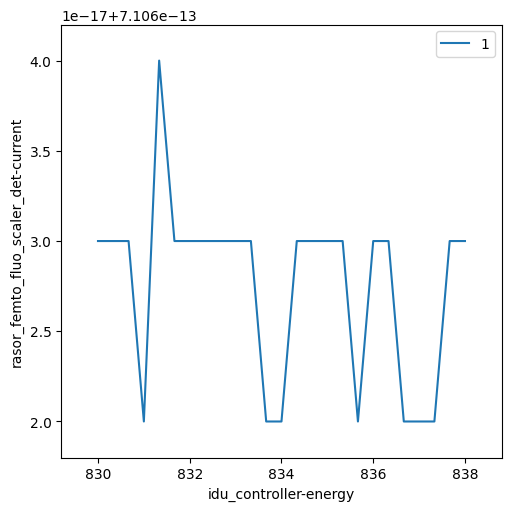

In [15]:
RE(bp.scan([i10.rasor_femto_fluo_scaler_det],i10.energy_ud, 830, 838, 25),bec)